## Introduction to network-based analysis in biomedicine with python (Part 3) [Solutions]

<p style="padding: 10px 10px 30px 10px; border: 2px solid red;">
<b>Box 1: Exercise</b>
How many connected components are there in the network? Extract the largest connected component.
</p>

In [7]:
# extract the connected components 
graphs = (ppi.subgraph(c).copy() for c in nx.connected_components(ppi))

print("Number of connected components:", nx.number_connected_components(ppi))

# let's check the number of edges and node of each connected component
for g in graphs:
    if g.number_of_nodes() == 1: # skip the iteration if the connected component contains only one node
        continue
    else:
        print("--------------")
        print(g.number_of_nodes())
        print(g.number_of_edges())

Number of connected components: 56
--------------
18446
327868
--------------
3
2
--------------
2
1
--------------
2
1


In [8]:
# select the largest connected component
G = list(ppi.subgraph(c).copy() for c in sorted(nx.connected_components(ppi), key = len, reverse = True))[0]
print(len(G.nodes()), len(G.edges()))

18446 327868


In [9]:
# remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

<p style="padding: 10px 10px 30px 10px; border: 2px solid red;">
<b>Box 2: Exercise</b>
Extract sub-network of the human proteins known to interact with SARS-CoV-2 virus and plot the network of the top 10 most central proteins by degree.
</p>

382
16
[10956]
[166, 5318, 5576, 7879, 55755, 11116, 2801, 10142, 5566]
The Subgraph:


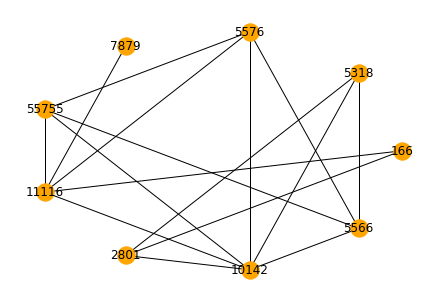

In [12]:
# extract a subgraph by selecting SARSCoV2 targets and all the edges between them
H = nx.Graph(G.subgraph(list(dt['EntrezID'])))
print(len(H.edges()))

# sort the nodes based (descending order) based on degree centrality 
degCent_sorted = [item[0] for item in sorted(H.degree, key=lambda x: x[1], reverse=True)]

# extract a subgraph of the top 10 central nodes
H2 = nx.Graph(H.subgraph(degCent_sorted[0:10]))
print(len(H2.edges()))

# find isolated nodes
isolated_nodes = list(nx.isolates(H2))
print(isolated_nodes)

# remove isolated nodes
H2.remove_nodes_from(isolated_nodes)

# print out remaining node names
print(H2.nodes())

#plt.subplot(111)
print("The Subgraph:")
nx.draw_circular(H2, node_color='orange', with_labels = True)

<p style="padding: 10px 10px 30px 10px; border: 2px solid red;">
<b>Box 3: Exercise</b>
Identify communities in the sub-network of the human proteins targeted by SARS-CoV-2 virus using Girvan-Newman method. 
Evaluate the partition based on modularity, coverage and performance.
How many communities were detected? Print number of nodes in eah community.
</p>

In [13]:
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms import community

# find and remove isolated nodes
isolated_nodes = list(nx.isolates(H))
H.remove_nodes_from(isolated_nodes)

# identify communities
communities = girvan_newman(H)
node_groups = tuple(sorted(c) for c in next(communities))

In [14]:
# evaluating the quality of partition
print("Coverage: ", community.coverage(H, node_groups))
print("Performance: ", community.performance(H, node_groups))
print("Modularity: ", community.modularity(H, node_groups))

Coverage:  0.9921465968586387
Performance:  0.3631728842164481
Modularity:  0.19453619692442634


14
[192, 2, 16, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 3]
1


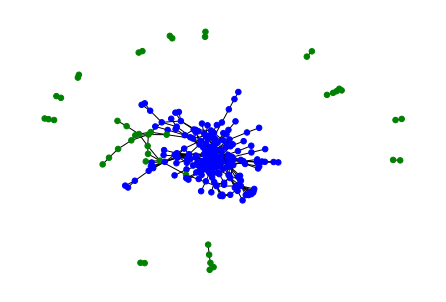

In [15]:
# check how many communities were detected and how big they are
print(len(node_groups))
print([len(com) for com in node_groups])

# select the communities with at least twenty five nodes
node_groups = [com for com in node_groups if len(com) > 25]
print(len(node_groups))

# define the color map
color_map = []
for node in H:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
        
nx.draw(H, node_color=color_map, with_labels=False,  node_size = 30)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6f9e27d-71eb-4664-8c0d-e7e02cc44214' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>